# Lab work #2
# Yuliia Shevchenko
# CS32
# Variant 0

# The lab work task
Solve the regression problem for the one of the presented datasets using the same steps into your work.
To get you variant: (your_num % 9), where your_num is your number in the group list.

In addition to presented in the example methods consider other ML methods like Support Vector Machine, Gradient Boosting Regression, Bayesian Ridge Regression.

Present your work in the Jupyter Notebook variant

P.s. in provided data sources you can find examples of solving this problem, but be ready to explain the code and results.

# Data to choose
0. [Gold Price Prediction](https://www.kaggle.com/datasets/franciscogcc/financial-data)
1. [Possum Regression](https://www.kaggle.com/datasets/abrambeyer/openintro-possum/data)
2. [Student Performance](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
3. [Boston House Prices](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data)
4. [Car Price](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)
5. [Medical Cost](https://www.kaggle.com/datasets/mirichoi0218/insurance)
6. [Crab Age Prediction](https://www.kaggle.com/datasets/sidhus/crab-age-prediction)
7. [Calculate Concrete Strength](https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking)
8. [Advertising dataset](https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset)

In [1]:
import os

import numpy as np  # linear algebra
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor)

from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("financial_regression.csv")
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [3]:
df.columns

Index(['date', 'sp500 open', 'sp500 high', 'sp500 low', 'sp500 close',
       'sp500 volume', 'sp500 high-low', 'nasdaq open', 'nasdaq high',
       'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low',
       'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver open',
       'silver high', 'silver low', 'silver close', 'silver volume',
       'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close',
       'oil volume', 'oil high-low', 'platinum open', 'platinum high',
       'platinum low', 'platinum close', 'platinum volume',
       'platinum high-low', 'palladium open', 'palladium high',
       'palladium low', 'palladium close', 'palladium volume',
       'palladium high-low', 'gold open', 'gold high', 'gold low',
       'gold close', 'gold volume'],
      dtype='object')

In [4]:
selected_columns = ['sp500 close', 'oil close', 'silver close',
                    'eur_usd', 'palladium open', 'platinum close',
                    'gold close'
]
df_train = df[selected_columns]

In [5]:
print(df_train.isnull().sum())

sp500 close       185
oil close         185
silver close      185
eur_usd           210
palladium open    185
platinum close    185
gold close        185
dtype: int64


In [6]:
print(df_train.duplicated().sum())
df_train = df_train.drop_duplicates()

167


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3737 entries, 0 to 3903
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sp500 close     3719 non-null   float64
 1   oil close       3719 non-null   float64
 2   silver close    3719 non-null   float64
 3   eur_usd         3694 non-null   float64
 4   palladium open  3719 non-null   float64
 5   platinum close  3719 non-null   float64
 6   gold close      3719 non-null   float64
dtypes: float64(7)
memory usage: 233.6 KB


In [8]:
cat_val = df_train.select_dtypes(include=['object']).columns
num_val = df_train.select_dtypes(include=['int', "float"]).columns

print(cat_val,'\n',num_val)

Index([], dtype='object') 
 Index(['sp500 close', 'oil close', 'silver close', 'eur_usd', 'palladium open',
       'platinum close', 'gold close'],
      dtype='object')


In [9]:
for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'sp500 close': [114.93 113.64    nan ... 583.63 583.32 577.99]
Unique values in column 'oil close': [39.06 38.4    nan ... 72.26 73.98 73.55]
Unique values in column 'silver close': [18.66 18.41   nan ... 32.12 33.23 32.15]
Unique values in column 'eur_usd': [1.4478 1.4376    nan ... 1.1116 1.1147 1.1159]
Unique values in column 'palladium open': [43.93 45.18   nan ... 98.28 98.77 98.01]
Unique values in column 'platinum close': [161.45 160.25    nan ...  91.35  90.47  94.51]
Unique values in column 'gold close': [112.03 110.86    nan ... 251.22 253.93 250.87]


In [10]:
df_train.head()

,sp500 close,oil close,silver close,eur_usd,palladium open,platinum close,gold close
0,114.93,39.06,18.66,1.4478,43.93,161.45,112.03
1,113.64,38.40,18.41,1.4376,45.18,160.25,110.86
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,115.06,38.93,18.79,1.4269,46.01,165.12,111.52
4,113.89,37.89,17.86,1.4094,46.59,163.22,108.94


In [11]:
df_train = df_train.fillna(df_train.median(numeric_only=True))

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3737 entries, 0 to 3903
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sp500 close     3737 non-null   float64
 1   oil close       3737 non-null   float64
 2   silver close    3737 non-null   float64
 3   eur_usd         3737 non-null   float64
 4   palladium open  3737 non-null   float64
 5   platinum close  3737 non-null   float64
 6   gold close      3737 non-null   float64
dtypes: float64(7)
memory usage: 233.6 KB


In [13]:
print(df_train.isnull().sum())

sp500 close       0
oil close         0
silver close      0
eur_usd           0
palladium open    0
platinum close    0
gold close        0
dtype: int64


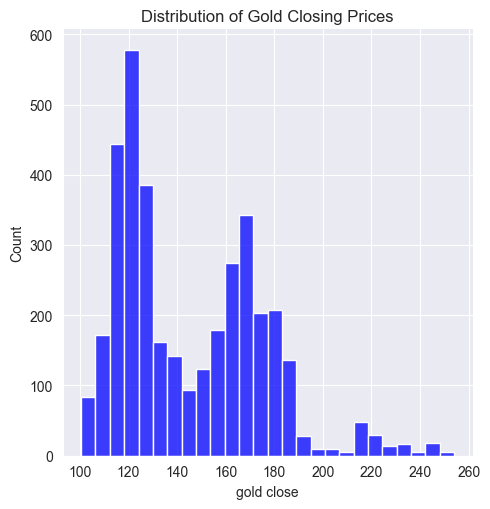

In [14]:
sns.displot(df['gold close'],color='blue')
plt.title('Distribution of Gold Closing Prices')
plt.show()

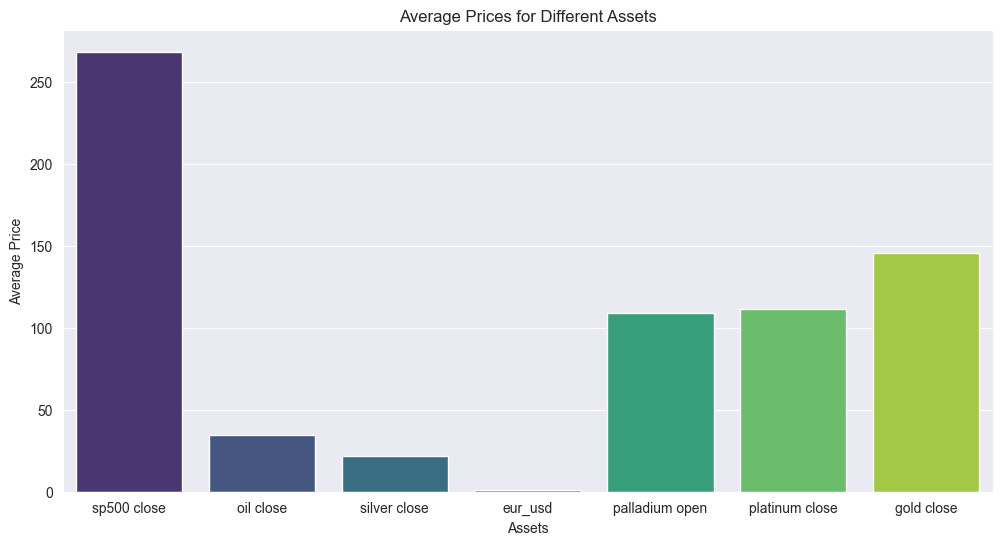

In [15]:
 bar_data = df_train.mean()

#Створення барплот
plt.figure(figsize=(12, 6))
sns.barplot(x=bar_data.index, y=bar_data.values, palette='viridis')
plt.title('Average Prices for Different Assets')
plt.ylabel('Average Price')
plt.xlabel('Assets')
plt.show()

In [16]:
df_train.sample(10)

,sp500 close,oil close,silver close,eur_usd,palladium open,platinum close,gold close
2790,330.06,29.78,25.19,1.1766,197.60,88.88,189.5900
503,123.05,38.61,30.44,1.3094,65.40,145.46,158.4500
3870,540.36,68.93,26.69,1.1086,87.01,84.58,230.6300
732,141.42,31.97,31.37,1.2971,59.38,154.49,165.4258
2960,395.78,41.92,23.82,1.1779,240.89,109.99,160.3100
3238,437.97,80.41,24.88,1.0785,223.65,94.05,184.6100
3610,446.51,79.68,21.90,1.0737,114.57,83.32,177.0800
3517,412.74,64.26,24.54,1.1020,143.50,99.10,187.6900
2733,295.00,24.31,16.40,1.0904,189.21,77.60,162.6900
1301,201.79,21.34,15.52,1.2406,76.25,115.75,114.2700


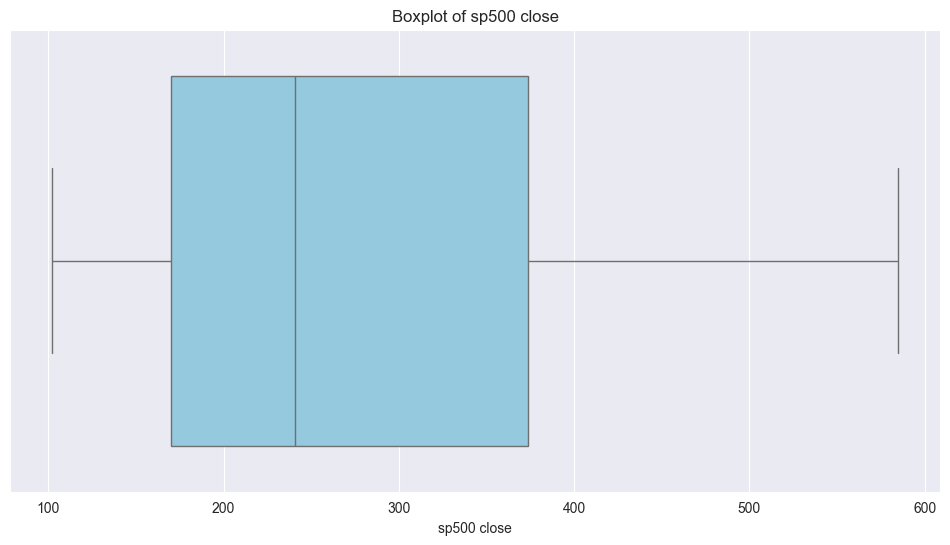

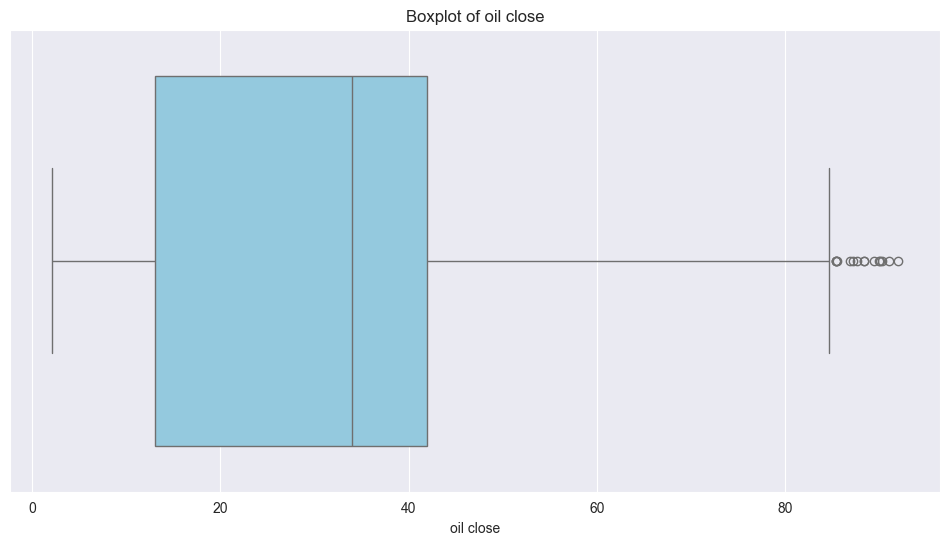

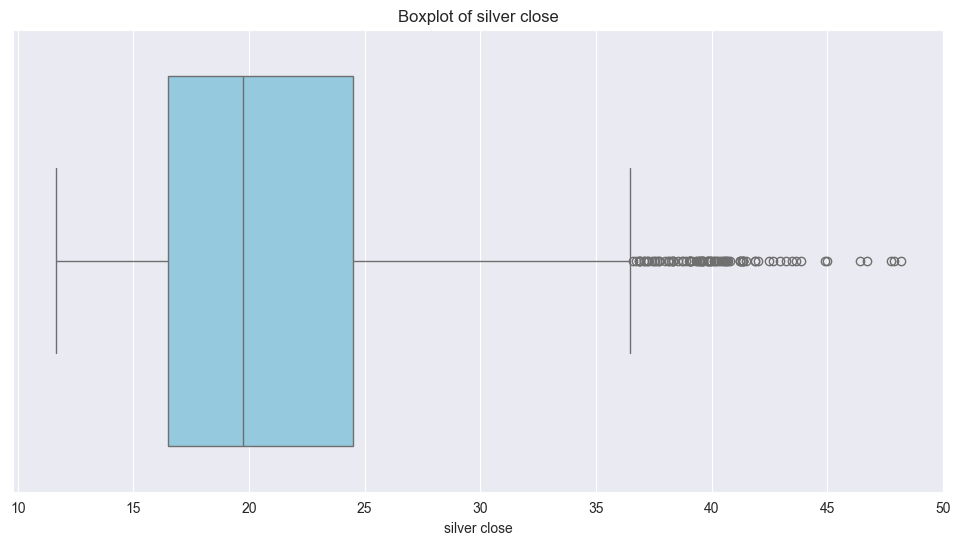

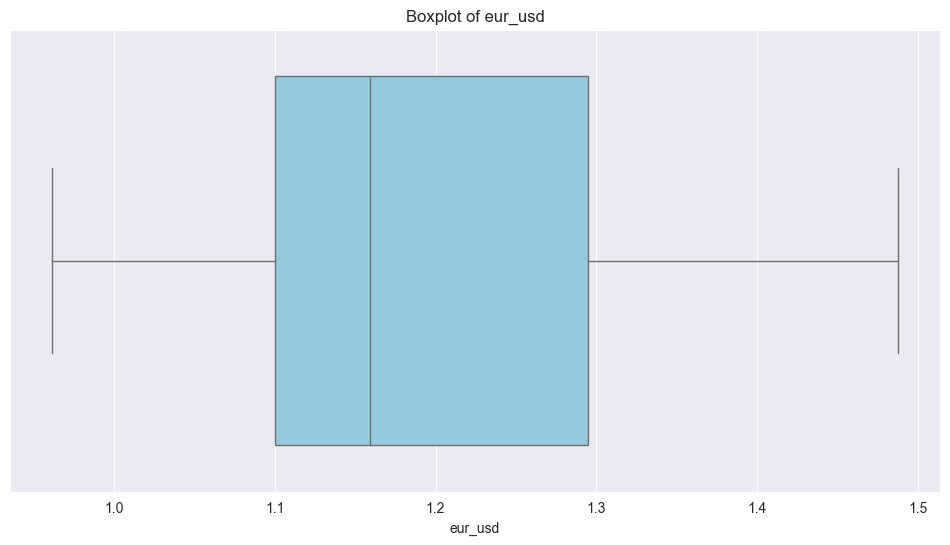

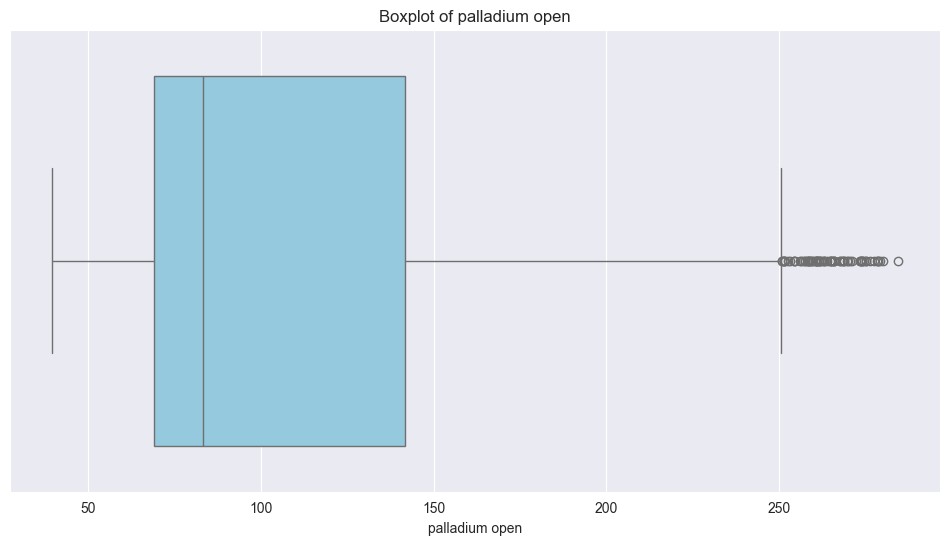

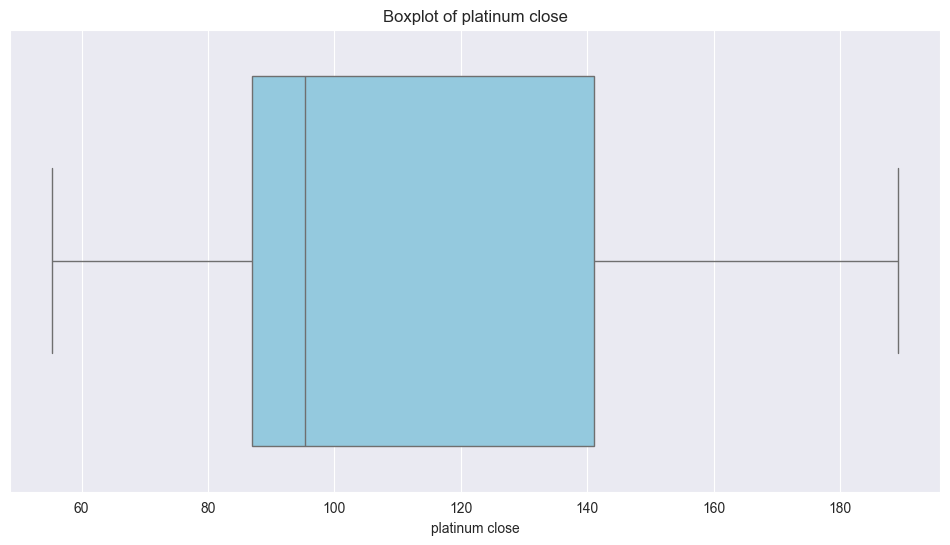

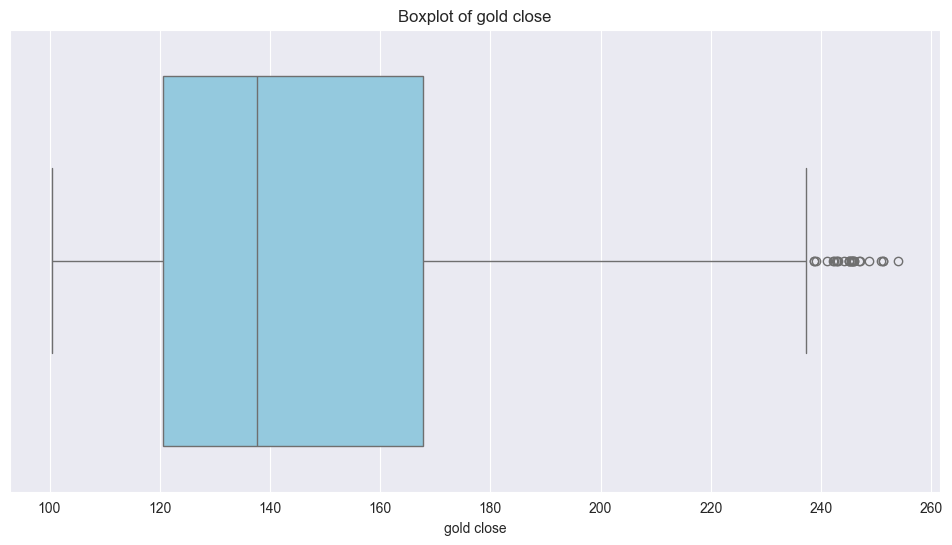

In [17]:
def plot_boxplots(data, columns):
    for col in columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=data, x=col, color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

columns_to_plot = ['gold close','sp500 close', 'nasdaq close',
                   'silver high-low', 'platinum high-low','palladium high-low']

# Викликаємо функцію для побудови boxplot
plot_boxplots(df_train, df_train)

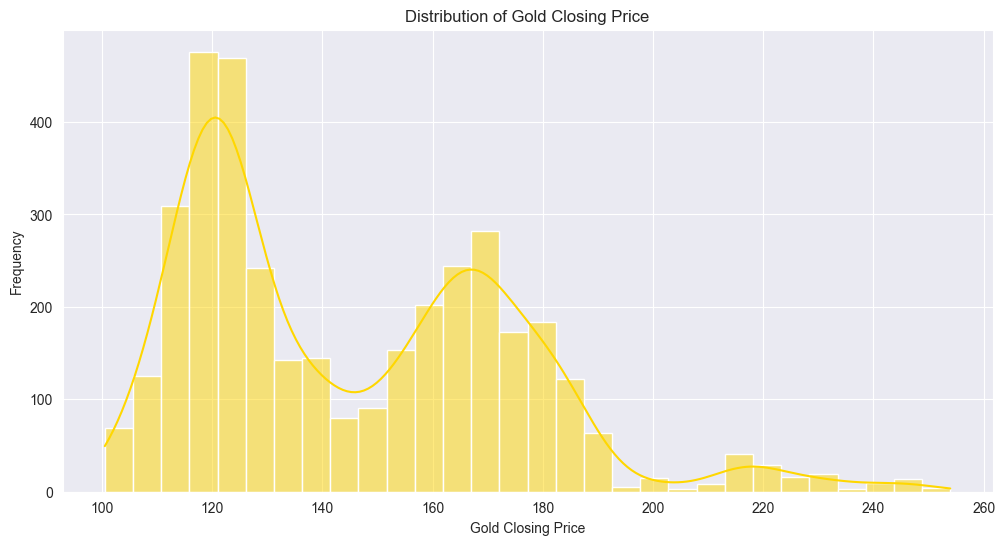

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df_train['gold close'], bins=30, kde=True, color='gold')
plt.title('Distribution of Gold Closing Price')
plt.xlabel('Gold Closing Price')
plt.ylabel('Frequency')
plt.show()


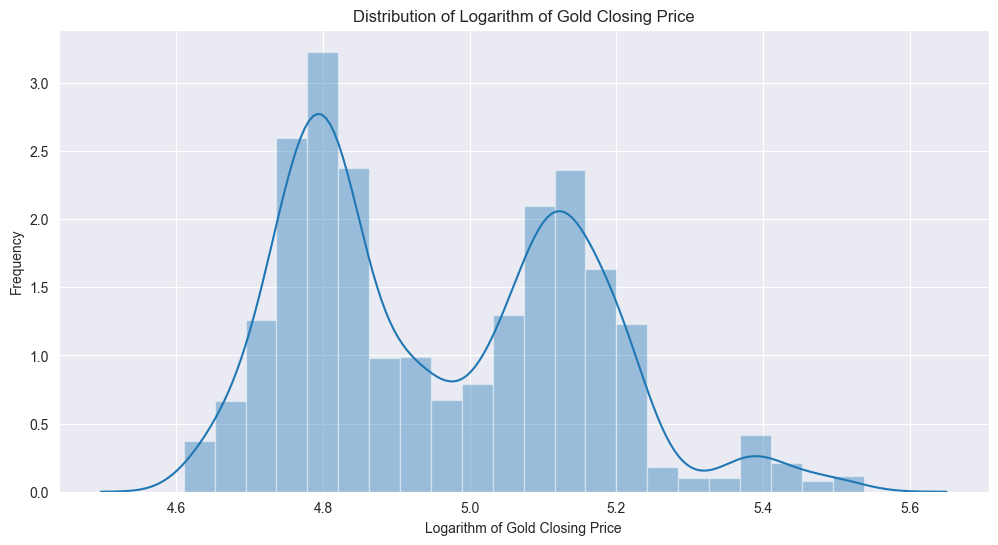

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(np.log(df_train['gold close']))
plt.title('Distribution of Logarithm of Gold Closing Price')
plt.xlabel('Logarithm of Gold Closing Price')
plt.ylabel('Frequency')
plt.show()


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3737 entries, 0 to 3903
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sp500 close     3737 non-null   float64
 1   oil close       3737 non-null   float64
 2   silver close    3737 non-null   float64
 3   eur_usd         3737 non-null   float64
 4   palladium open  3737 non-null   float64
 5   platinum close  3737 non-null   float64
 6   gold close      3737 non-null   float64
dtypes: float64(7)
memory usage: 233.6 KB


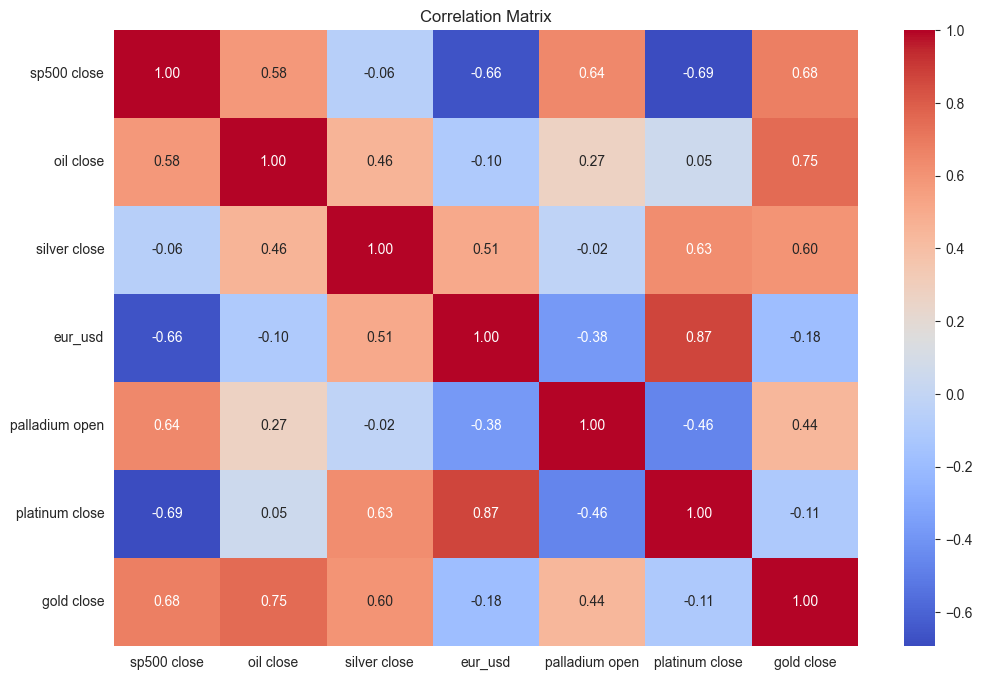

In [21]:
plt.figure(figsize=(12,8))
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [22]:
## 4. Final data preps
x = df_train.drop(['gold close'], axis=1)
y = np.log(df_train['gold close'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((2989, 6), (748, 6))

In [24]:
df_train.head()

,sp500 close,oil close,silver close,eur_usd,palladium open,platinum close,gold close
0,114.93,39.06,18.66,1.4478,43.93,161.45,112.03
1,113.64,38.40,18.41,1.4376,45.18,160.25,110.86
2,240.61,33.94,19.73,1.1591,83.38,95.38,137.71
3,115.06,38.93,18.79,1.4269,46.01,165.12,111.52
4,113.89,37.89,17.86,1.4094,46.59,163.22,108.94


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3737 entries, 0 to 3903
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sp500 close     3737 non-null   float64
 1   oil close       3737 non-null   float64
 2   silver close    3737 non-null   float64
 3   eur_usd         3737 non-null   float64
 4   palladium open  3737 non-null   float64
 5   platinum close  3737 non-null   float64
 6   gold close      3737 non-null   float64
dtypes: float64(7)
memory usage: 233.6 KB


In [26]:

lr = LinearRegression()

pipe = Pipeline([
    ('lr', lr)
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print('Train R2 score', metrics.r2_score(y_train,y_train_pred))
print('Train MAE', metrics.mean_absolute_error(y_train,y_train_pred))
print("Train MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_train,y_train_pred)))
print("Train RMSE on the orig price:", np.exp(metrics.root_mean_squared_error(y_train,y_train_pred)))
print("Train MSE on the orig price:", np.exp(metrics.mean_squared_error(y_train,y_train_pred)), "\n")

print('Test R2 score', metrics.r2_score(y_test,y_pred))
print('Test MAE', metrics.mean_absolute_error(y_test,y_pred))
print("Test MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_test,y_pred)))
print("Test RMSE on the orig price:", np.exp(metrics.root_mean_squared_error(y_test,y_pred)))
print("Test MSE on the orig price:", np.exp(metrics.mean_squared_error(y_test,y_pred)), "\n")

Train R2 score 0.8945027217285741
Train MAE 0.049280176562180304
Train MAE on the orig price: 1.0505146390918545
Train RMSE on the orig price: 1.065412243097152
Train MSE on the orig price: 1.0040227883626829 

Test R2 score 0.8782622258242738
Test MAE 0.05140159090476542
Test MAE on the orig price: 1.0527455814542046
Test RMSE on the orig price: 1.0705391942762568
Test MSE on the orig price: 1.0046569283652693 



In [27]:
bayes = BayesianRidge()

pipe = Pipeline([
    ('bayes', bayes)
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print('Train R2 score', metrics.r2_score(y_train,y_train_pred))
print('Train MAE', metrics.mean_absolute_error(y_train,y_train_pred))
print("Train MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_train,y_train_pred)))
print("Train RMSE on the orig price:", np.exp(metrics.root_mean_squared_error(y_train,y_train_pred)))
print("Train MSE on the orig price:", np.exp(metrics.mean_squared_error(y_train,y_train_pred)), "\n")

print('Test R2 score', metrics.r2_score(y_test,y_pred))
print('Test MAE', metrics.mean_absolute_error(y_test,y_pred))
print("Test MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_test,y_pred)))
print("Test RMSE on the orig price:", np.exp(metrics.root_mean_squared_error(y_test,y_pred)))
print("Test MSE on the orig price:", np.exp(metrics.mean_squared_error(y_test,y_pred)), "\n")

Train R2 score 0.8942920642379555
Train MAE 0.049253732633935475
Train MAE on the orig price: 1.0504868597254176
Train RMSE on the orig price: 1.0654796102176742
Train MSE on the orig price: 1.0040308372541331 

Test R2 score 0.8776773783793463
Test MAE 0.05144863921570762
Test MAE on the orig price: 1.0527951125208312
Test RMSE on the orig price: 1.0707142796220268
Test MSE on the orig price: 1.0046793532461877 



In [28]:
lasso = Lasso(alpha=0.001)

pipe = Pipeline([
    ('lasso', lasso)
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print('Train R2 score', metrics.r2_score(y_train,y_train_pred))
print('Train MAE', metrics.mean_absolute_error(y_train,y_train_pred))
print("Train MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_train,y_train_pred)))
print("Train RMSE on the orig price:", np.exp(metrics.root_mean_squared_error(y_train,y_train_pred)))
print("Train MSE on the orig price:", np.exp(metrics.mean_squared_error(y_train,y_train_pred)), "\n")

print('Test R2 score', metrics.r2_score(y_test,y_pred))
print('Test MAE', metrics.mean_absolute_error(y_test,y_pred))
print("Test MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_test,y_pred)))
print("Test RMSE on the orig price:", np.exp(metrics.root_mean_squared_error(y_test,y_pred)))
print("Test MSE on the orig price:", np.exp(metrics.mean_squared_error(y_test,y_pred)), "\n")

Train R2 score 0.8941185718541442
Train MAE 0.04929366540012417
Train MAE on the orig price: 1.0505288094091492
Train RMSE on the orig price: 1.0655350449434688
Train MSE on the orig price: 1.0040374661737492 

Test R2 score 0.8774906870670941
Test MAE 0.051489663020504964
Test MAE on the orig price: 1.0528383030679331
Test RMSE on the orig price: 1.070770087110935
Test MSE on the orig price: 1.0046865116806138 



In [29]:
dtr = DecisionTreeRegressor(max_depth=2)

pipe = Pipeline([
    ('dtr', dtr)
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print('Train R2 score', metrics.r2_score(y_train,y_train_pred))
print('Train MAE', metrics.mean_absolute_error(y_train,y_train_pred))
print("Train MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_train,y_train_pred)), "\n")

print('Test R2 score', metrics.r2_score(y_test,y_pred))
print('Test MAE', metrics.mean_absolute_error(y_test,y_pred))
print("Test MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_test,y_pred)))

Train R2 score 0.8227374590407648
Train MAE 0.06068366918326037
Train MAE on the orig price: 1.0625627396795403 

Test R2 score 0.8122640488724059
Test MAE 0.061889588838575815
Test MAE on the orig price: 1.0638448778947847


In [30]:
random = RandomForestRegressor(n_estimators=20,
                              random_state=1,
                              max_samples=0.2,
                              max_features=0.75,
                               min_samples_split=5,
                               min_samples_leaf=4,
                              max_depth=3)
pipe = Pipeline([
    ('random', random)
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print('Train R2 score', metrics.r2_score(y_train,y_train_pred))
print('Train MAE', metrics.mean_absolute_error(y_train,y_train_pred))
print("Train MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_train,y_train_pred)), "\n")

print('Test R2 score', metrics.r2_score(y_test,y_pred))
print('Test MAE', metrics.mean_absolute_error(y_test,y_pred))
print("Test MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_test,y_pred)))

Train R2 score 0.9279339746685592
Train MAE 0.04047670817393145
Train MAE on the orig price: 1.041307055477236 

Test R2 score 0.9165788859639327
Test MAE 0.04330252486729706
Test MAE on the orig price: 1.0442537597998105


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape,X_test.shape

((2989, 6), (748, 6))

In [32]:
rfr = RandomForestRegressor()

In [52]:
param_grid = {
    "n_estimators": [20,50,100],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [1,2,4],
    "max_depth": [2,5,7],
    "bootstrap": [True, False],
}


In [53]:
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='r2')

In [41]:
rfr =  RandomForestRegressor(bootstrap=True, max_depth=7, max_features='sqrt',
                      min_samples_split=4, n_estimators=100)

In [42]:
rf_grid = rfr.fit(X_train,y_train)

In [43]:
y_train_pred = rf_grid.predict(X_train)
y_pred = rf_grid.predict(X_test)

print('Train R2 score', metrics.r2_score(y_train,y_train_pred))
print('Train MAE', metrics.mean_absolute_error(y_train,y_train_pred))
print("Train MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_train,y_train_pred)), "\n")

print('Test R2 score', metrics.r2_score(y_test,y_pred))
print('Test MAE', metrics.mean_absolute_error(y_test,y_pred))
print("Test MAE on the orig price:", np.exp(metrics.mean_absolute_error(y_test,y_pred)))

Train R2 score 0.9893308766714878
Train MAE 0.015549018052247059
Train MAE on the orig price: 1.0156705330293734 

Test R2 score 0.9840782302657014
Test MAE 0.018564925927890708
Test MAE on the orig price: 1.0187383255535034


In [44]:
predicted = []
testtrain = np.array(x)
for i in range(len(testtrain)):
    predicted.append(rfr.predict([testtrain[i]]))

predicted

[array([4.73539361]),
 array([4.7271066]),
 array([4.88927143]),
 array([4.73764751]),
 array([4.72104666]),
 array([4.71890705]),
 array([4.71550166]),
 array([4.71489085]),
 array([4.70895461]),
 array([4.71060111]),
 array([4.70605904]),
 array([4.70695646]),
 array([4.70993287]),
 array([4.71220414]),
 array([4.71038243]),
 array([4.700346]),
 array([4.70589199]),
 array([4.70849236]),
 array([4.70425169]),
 array([4.6992849]),
 array([4.70411893]),
 array([4.70266189]),
 array([4.71082648]),
 array([4.71084829]),
 array([4.71102754]),
 array([4.71103385]),
 array([4.71118788]),
 array([4.70597688]),
 array([4.70658917]),
 array([4.70983079]),
 array([4.70961386]),
 array([4.71163497]),
 array([4.7171019]),
 array([4.71578085]),
 array([4.7176081]),
 array([4.71810494]),
 array([4.7170003]),
 array([4.71505209]),
 array([4.71369346]),
 array([4.71372965]),
 array([4.71337523]),
 array([4.71421552]),
 array([4.71686837]),
 array([4.71793869]),
 array([4.71811481]),
 array([4.7178236

In [45]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [46]:
rounded_gold_close = [round(pred) for pred in ans]


In [47]:
df_train['Predicted Gold Close'] = np.array(rounded_gold_close)
df_train

,sp500 close,oil close,silver close,eur_usd,palladium open,platinum close,gold close,Predicted Gold Close
0,114.93,39.06,18.66,1.4478,43.93,161.45,112.03,114
1,113.64,38.40,18.41,1.4376,45.18,160.25,110.86,113
2,240.61,33.94,19.73,1.1591,83.38,95.38,137.71,133
3,115.06,38.93,18.79,1.4269,46.01,165.12,111.52,114
4,113.89,37.89,17.86,1.4094,46.59,163.22,108.94,112
...,...,...,...,...,...,...,...,...
3899,582.35,72.62,30.25,1.0837,94.64,91.16,248.63,243
3900,584.59,71.38,32.12,1.0854,97.90,92.98,251.27,246
3901,583.63,72.26,32.32,1.1591,98.28,92.27,251.22,247
3902,583.32,73.98,33.23,1.1591,98.77,94.51,253.93,247


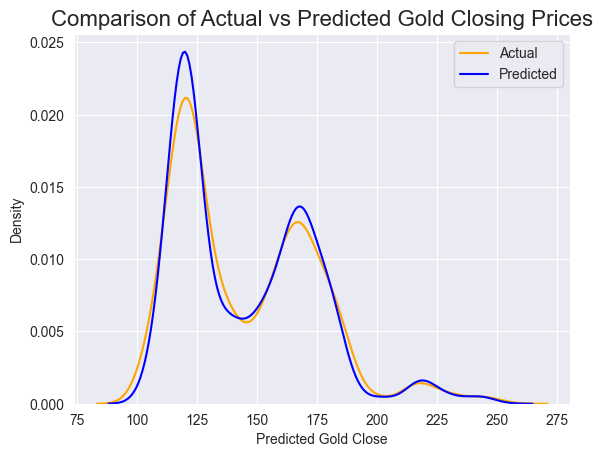

In [48]:
sns.distplot(df_train['gold close'],hist=False,color='orange',label='Actual')
sns.distplot(df_train['Predicted Gold Close'],hist=False,color='blue',label='Predicted')
plt.title('Comparison of Actual vs Predicted Gold Closing Prices', fontsize=16)
plt.legend()
plt.show()

<Axes: xlabel='gold close', ylabel='Predicted Gold Close'>

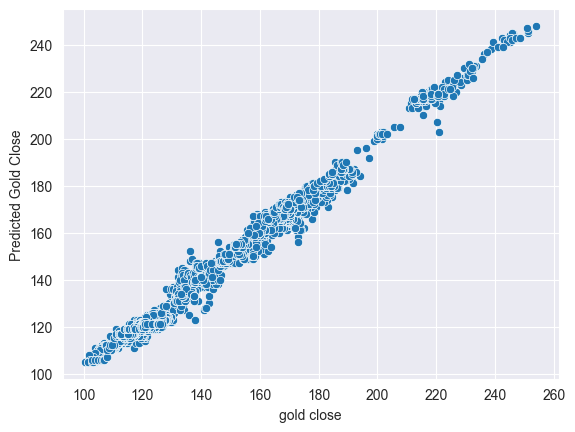

In [1105]:
sns.scatterplot(data=df_train, x="gold close", y="Predicted Gold Close")
plt.title("Actual vs Predicted Gold Closing Prices", fontsize=16)
plt.xlabel("Actual Gold Close", fontsize=12)
plt.ylabel("Predicted Gold Close", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [50]:
df_train["log(Gold close)"] = np.log(df_train["gold close"])
df_train["log(Pred_Gold_Close)"] = np.log(df_train["Predicted Gold Close"])

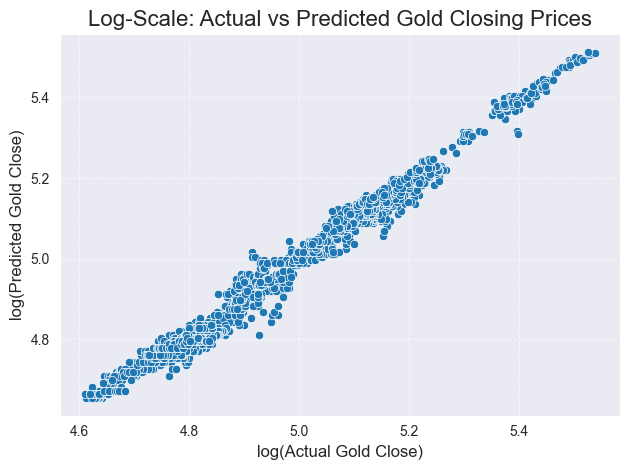

In [51]:
sns.scatterplot(data=df_train, x="log(Gold close)", y="log(Pred_Gold_Close)")
plt.title("Log-Scale: Actual vs Predicted Gold Closing Prices", fontsize=16)
plt.xlabel("log(Actual Gold Close)", fontsize=12)
plt.ylabel("log(Predicted Gold Close)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
